**Task 5 :  Personal Loan Acceptance Prediction**

In [15]:
# ----------------------------------------------
# 📂 Step 1: Load the Dataset
# 🔍 Objective: Load and inspect the Bank Marketing dataset
# ----------------------------------------------

import pandas as pd  # Importing pandas for data handling

# ✅ Read the dataset from the uploaded file (semicolon-separated CSV)
df = pd.read_csv('bank-additional-full.csv', sep=';')  # Make sure separator is correct

# ✅ Display basic information about the dataset (rows, columns, data types, missing values)
print(df.info())

# ✅ Show the first 5 rows of the dataset to get an overview of the structure and values
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
# ----------------------------------------------
# 📊 Step 2: Import Libraries for Visualization
# 🔍 Objective: Check dataset structure before analysis
# ----------------------------------------------

import seaborn as sns       # For statistical visualizations
import matplotlib.pyplot as plt  # For basic plotting

# ✅ Print the column names to understand what features are available
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [17]:
# ----------------------------------------------
# 📊 Step 3: Understand Dataset Structure & Contents
# 🔍 Objective: Perform initial data exploration
# ----------------------------------------------

# ✅ Check overall structure of the dataset: column names, non-null counts, and data types
print(df.info())

# ✅ Preview the first few rows of the dataset to understand how the data looks
print(df.head())

# ✅ Display summary statistics for both numerical and categorical columns
#    include='all' ensures that we get insights on object (categorical) columns too
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
# ---------------------------------------
# Check for Missing Values in the Dataset
# ---------------------------------------
# This step identifies if there are any missing (null) values in each column.
# Knowing missing data helps in deciding data cleaning or imputation strategies.
print(df.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


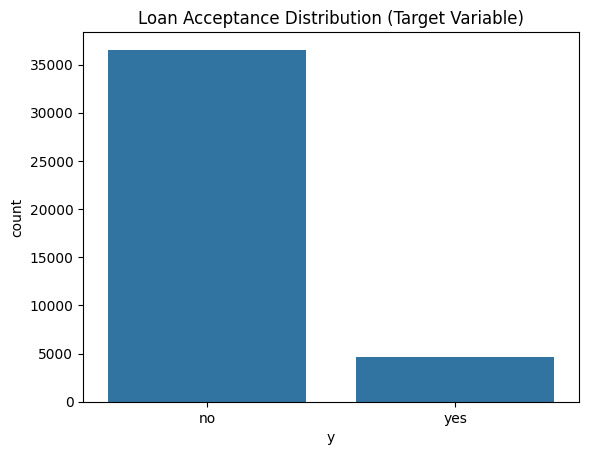

In [19]:
# --------------------------------------------------------
# Visualize Distribution of Target Variable 'y' (Loan Acceptance)
# --------------------------------------------------------
# This plot shows the count of customers who accepted ('yes') or declined ('no')
# the personal loan offer, helping us understand class balance in the dataset.
sns.countplot(x='y', data=df)
plt.title("Loan Acceptance Distribution (Target Variable)")
plt.show()


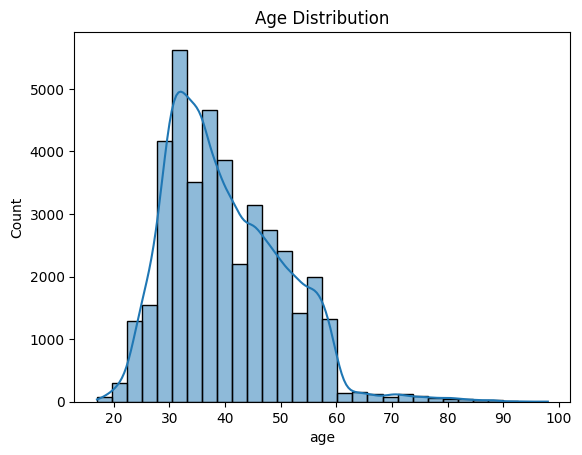

In [6]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


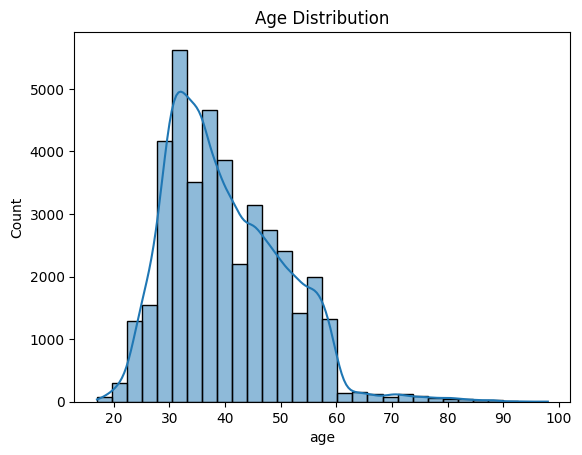

In [20]:
# ---------------------------------------------
# Visualize the Distribution of Customers' Age
# ---------------------------------------------
# Histogram with KDE (Kernel Density Estimate) to understand
# how ages are distributed across the dataset.
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


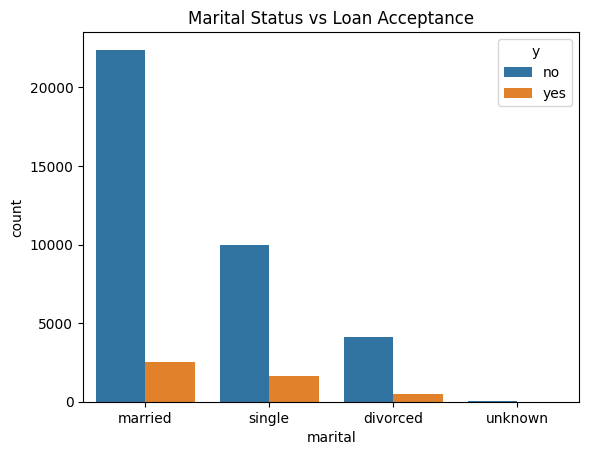

In [21]:
# --------------------------------------------------------
# Analyze Relationship Between Marital Status and Loan Acceptance
# --------------------------------------------------------
# Countplot to compare how different marital statuses relate to
# the likelihood of accepting a loan offer (target variable 'y').
sns.countplot(x='marital', hue='y', data=df)
plt.title("Marital Status vs Loan Acceptance")
plt.show()


In [22]:
# ----------------------------------------
# Encode target variable 'y' for modeling:
# Convert categorical 'yes'/'no' responses to binary 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [23]:
# ----------------------------------------
# Apply One-Hot Encoding on all categorical variables
# Convert categorical columns into binary dummy variables
# drop_first=True avoids dummy variable trap (multicollinearity)
df_encoded = pd.get_dummies(df, drop_first=True)


In [24]:
from sklearn.model_selection import train_test_split

# ----------------------------------------
# Prepare data for model training and evaluation

# Separate features (X) and target variable (y)
X = df_encoded.drop('y', axis=1)  # Features dataset without target column
y = df_encoded['y']               # Target variable (loan acceptance)

# Split data into training and testing sets
# 70% of data for training, 30% for testing to evaluate model performance
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
from sklearn.tree import DecisionTreeClassifier

# ----------------------------------------
# Train a Decision Tree Classifier

# Initialize the Decision Tree model with a fixed random state for reproducibility
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data (features and target)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ----------------------------------------
# Model Evaluation on Test Data

# Predict target values for the test set using the trained model
y_pred = tree_model.predict(X_test)

# Calculate and print the accuracy score (overall correctness)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate and print the confusion matrix to see true/false positives and negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print a detailed classification report showing precision, recall, f1-score for each class
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8898599983814842
Confusion Matrix:
 [[10275   693]
 [  668   721]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.52      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [27]:
import numpy as np

# ----------------------------------------
# Feature Importance Extraction for Decision Tree Model

# Get feature importance scores from the trained Decision Tree model
importances = tree_model.feature_importances_

# Sort feature indices by importance in descending order
indices = np.argsort(importances)[::-1]

# Get feature names from the dataset
features = X.columns

print("Top features influencing loan acceptance:")

# Print the top 10 most important features with their importance scores
for i in range(10):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")


Top features influencing loan acceptance:
duration: 0.3489
nr.employed: 0.1562
age: 0.0875
euribor3m: 0.0739
campaign: 0.0326
cons.conf.idx: 0.0239
pdays: 0.0232
housing_yes: 0.0146
previous: 0.0135
loan_yes: 0.0125
